In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib
%matplotlib notebook
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22, 'figure.figsize' : (40., 7.), 'lines.linewidth' : 3})

%load_ext autoreload
%autoreload 2

from Database import *
from Densities import *
from MultiIndex import *
from Surrogates import *
from Transport import *

import plotutil, randutil

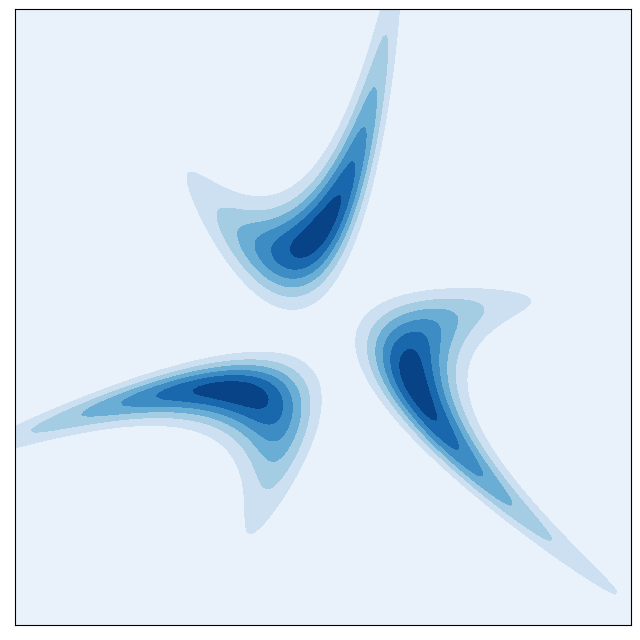

In [131]:
thetas = [-.3+i*2/3*np.pi for i in range(3)]
phis = [(6 + i*8)/12*np.pi for i in range(3)]
delta = 10*np.pi/72
ts = [t+delta for t in thetas]
ps = [p+delta for p in phis]
cs = [.3*np.array([np.cos(th), np.sin(th)-.2]) for th in ps]
t = MultimodalDensity(densities=[Rosenbrock(a=.4, b=4, theta=-t, centr=c, scale=3.5) for c, t in zip(cs,ts)], weights=[1,1,1])
fig = plt.figure(figsize=(8,8))
ax = plotutil.get_ax(fig, nx=1, idx=1, square=True, xlabel='')
qcs = plotutil.plot_density(ax, t, cmap='Blues')

In [ ]:

fname = 'knothe_target'
ax = plotutil.get_ax(fig, nx=1, idx=1, square=True, xlabel='')
plotutil.plot_density(ax, t_m, cmap='Blues')
for l in lines_t_m : ax.plot(l[0], l[1], '#c8c8c8', lw=2)
ax.scatter(p_tar_m[0], p_tar_m[1], s=7, color='#e41a1c', alpha=.9)
plt.tight_layout()
plt.savefig('/home/uq/notes/slides/230302 Amsterdam/figures/' + fname + '.pdf')
plt.show()

In [134]:
m_m = TotalDegreeSet(dim=2, order=22)
s_m = Legendre(multis=m_m, target=t)

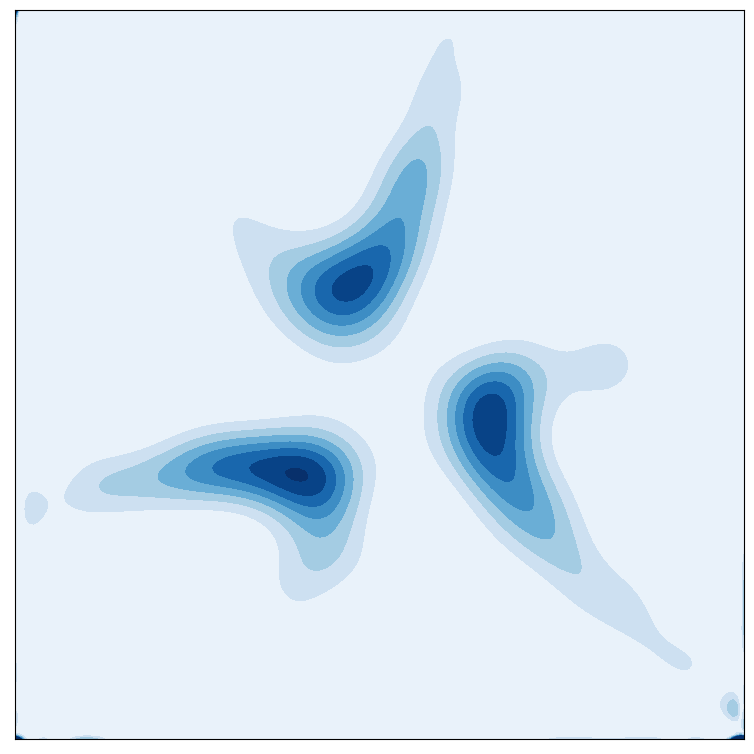

In [135]:
fig = plt.figure(figsize=(8,8))
ax = plotutil.get_ax(fig, nx=1, idx=1, square=True, xlabel='')
plotutil.plot_density(ax, s_m, qcs=qcs, cmap='Blues')

plt.tight_layout()
plt.savefig('/home/uq/notes/slides/230302 Amsterdam/figures/surrogate.pdf')
plt.show()

In [123]:
class uni :
    def eval(self, x) : return np.ones(x.shape[1])

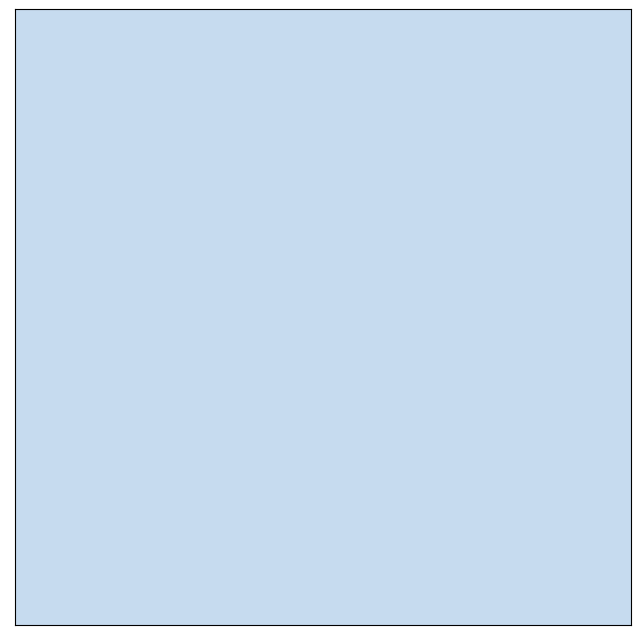

In [124]:
fig = plt.figure(figsize=(8,8))
ax = plotutil.get_ax(fig, nx=1, idx=1, square=True, xlabel='')
qcs = plotutil.plot_density(ax, uni(), cmap='Blues')

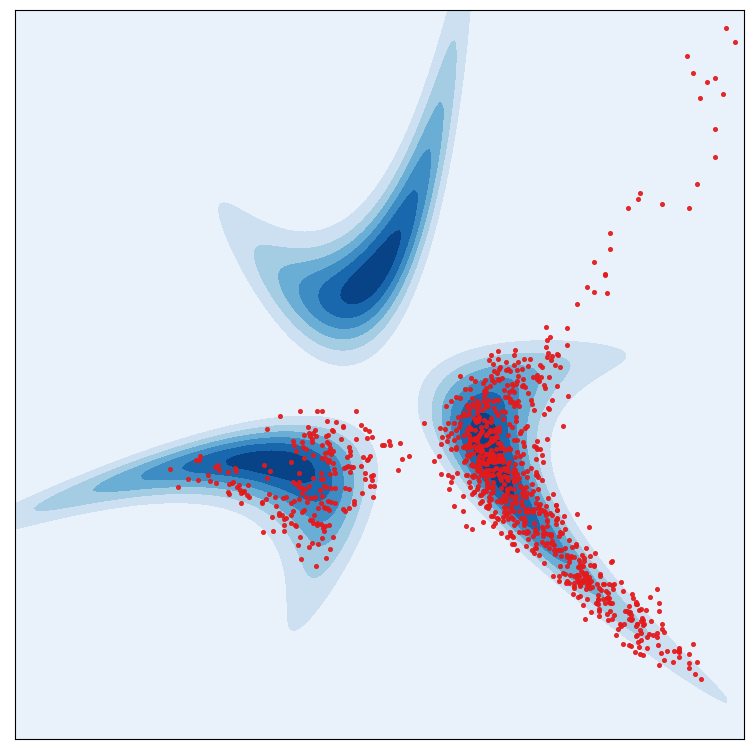

In [103]:
rng = np.random.default_rng()
n = 1000
samples = np.zeros((n,2))
samples[0,:] = [.95,.95]
cov = np.eye(2)*.002
i = 1
while i < n :
    cand = np.array([rng.multivariate_normal(mean=samples[i-1,:].T ,cov=cov)]).T
    if (cand >= -1).all() and (cand <= 1).all() :
        accp = t.eval(cand)/t.eval(np.array([samples[i-1,:]]).T)
        if rng.random() <= accp :
            samples[i,:] = cand[:,0]
            i += 1
            
m = 1
fig = plt.figure(figsize=(m*8,8))
ax = plotutil.get_ax(fig, nx=m, idx=1, square=True, xlabel='')
plotutil.plot_density(ax, t, cmap='Blues')
ax.scatter(samples[:,0], samples[:,1], s=7, color='#e41a1c', alpha=.9)
plt.tight_layout()
plt.savefig('/home/uq/notes/slides/230302 Amsterdam/figures/intro_target_mcmc.pdf', format='pdf')
plt.show()

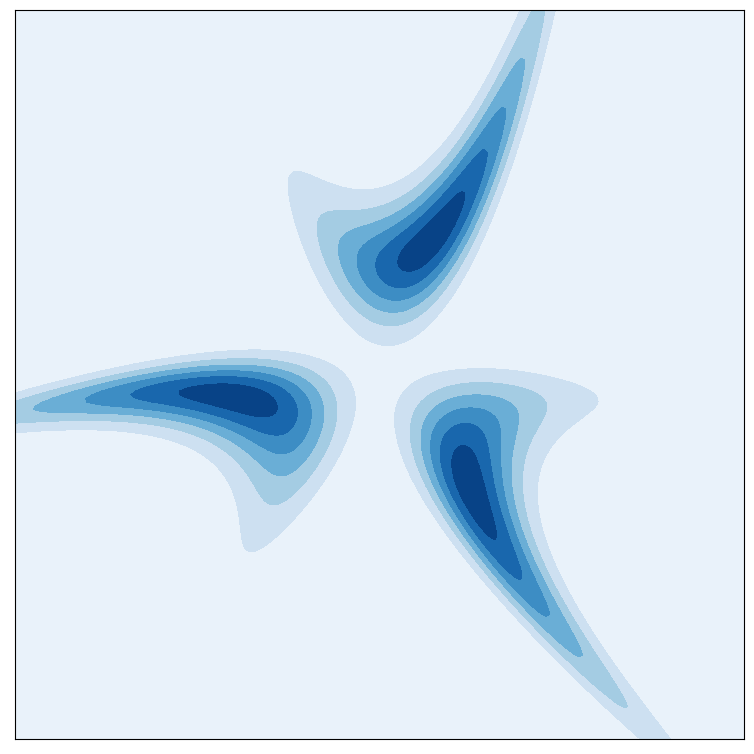

In [15]:
m = 1
fig = plt.figure(figsize=(m*8,8))
ax = plotutil.get_ax(fig, nx=m, idx=1, square=True, xlabel=''); plotutil.plot_density(ax, t, cmap='Blues')
plt.tight_layout()
plt.savefig('/home/uq/notes/slides/230302 Amsterdam/figures/mcmc_mixture_dens.pdf', format='pdf')
plt.show()